In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Tunable Filter Cavity
Three-mirror Fabry–Perot cavities (3MCs) exhibit richer and more tunable resonance structures than standard two-mirror cavities, due to the interference between their two sub-cavities.

<p align="center">
  <img src="threemirrorcavity.png" width="500"/>
</p>

The corresponding wavefunctions are given by:

<p align="center">
  <img src="threemirrorwavefunctions.png" width="500"/>
</p>


https://ccahilla.github.io/fabryperot.html

### Elements of the Three-Mirror System


#### 1. Mirror Reflectivities and Transmissivities

Each mirror \( M_i \) has:

$$
R_i = \text{Power reflectivity}, \quad T_i = 1 - R_i = \text{Power transmissivity}
$$

Amplitude coefficients:

$$
r_i = \sqrt{R_i}, \quad t_i = \sqrt{1 - R_i}
$$

#### 2. Subcavity Lengths

The three-mirror cavity is composed of two coupled subcavities:

$$
L_1 = \text{distance between } M_1 \text{ and } M_2 \\
L_2 = \text{distance between } M_2 \text{ and } M_3
$$

Each subcavity can resonate independently, and the coupling through M_2 gives rise to mode splitting.

---

Parameters:
$$
\lambda = 1064\,\text{nm}
$$

$$
L_1 = 1\,\text{m}, \quad L_2 = 3\,\text{m}
$$

$$
\Delta\nu \in [-155, 155]\,\text{MHz}
$$

$$
k = k_0 + \Delta k = \frac{2\pi}{c}(\nu_0 + \Delta\nu), \quad \text{where} \quad \nu_0 = \frac{c}{\lambda}
$$


In [4]:
#Constants + Parameters
c = 3e8                      
lambda0 = 1063.999e-9           
nu0 = c / lambda0            
k0 = 2 * np.pi / lambda0     
#Frequency detuning (Δν from -150 MHz to 150 MHz)
dnu = np.linspace(-200e6, 200e6, 1000)
nu = nu0+dnu
k = 2*np.pi*nu/c 


The transmitted field amplitude $t$ for a three-mirror Fabry-Perot cavity is given by:

$$
t = \frac{-t_1 t_2 t_3 \, e^{i k (L_1 + L_2)}}{e^{2i k (L_1 + L_2)} - r_1 r_2 \, e^{2i k L_2} - r_2 r_3 \, e^{2i k L_1} + r_1 r_3 (r_2^2 + t_2^2)}
$$

Where:
- $r_i$ is the amplitude reflectivity of mirror $i$  
- $t_i$ is the amplitude transmissivity of mirror $i$  
- $L_1$ and $L_2$ are the sub-cavity lengths  
- $k = \frac{2\pi}{\lambda}$ is the wave number



In [5]:
def T_three_mirror(k,L1,L2,R1,R2,R3):
    r1,r2,r3 = np.sqrt(R1), np.sqrt(R2), np.sqrt(R3)
    t1,t2,t3 = np.sqrt(1-R1), np.sqrt(1-R2), np.sqrt(1-R3) 
    # Phase terms
    e_total = np.exp(2j*k*(L1+L2))
    e_L2 = np.exp(2j*k*L2)
    e_L1 = np.exp(2j*k*L1)

    num = -t1*t2*t3*np.exp(1j*k*(L1+L2))
    denom = (e_total - r1*r2*e_L2 - r2*r2*e_L1 + r1*r3*(r2**2+t2**2))

    return np.abs(num / denom)**2

The standard Fabri-Perot Transmission Formula is given by:
$$
T_{\text{FP}} = \frac{T_1 T_2}{1 + R_1 R_2 - 2\sqrt{R_1 R_2} \cos(2kL)}
$$


In [6]:
#Standard Fabri-Perot Cavity
def T_fp(k, L,R1, R2):
    T1,T2 = 1-R1, 1-R2
    delta = 2*k*L
    return (T1*T2)/(1+ R1*R2 - 2*np.sqrt(R1*R2)*np.cos(delta))

def compute_fwhm(x, y):
    half_max = np.max(y) / 2.0
    indices = np.where(y >= half_max)[0]
    if len(indices) < 2:
        return 0.0
    fwhm = x[indices[-1]] - x[indices[0]]
    return fwhm

### L1 = 1 m , L2 = 3 m

In [7]:
#Compute spectra
R_test = 0.9
L1_test = 1
L2_test = 3
T3 = T_three_mirror(k, L1_test, L2_test, R_test, R_test, R_test)
TFP1 = T_fp(k, L1_test,R_test,R_test)
TFP3 = T_fp(k, L2_test,R_test,R_test)

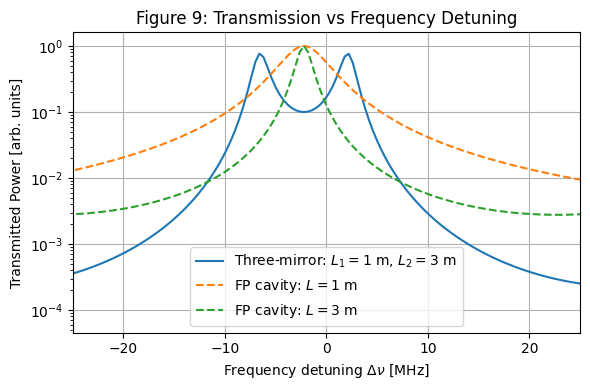

In [8]:
#Plots
plt.figure(figsize=(6, 4))
plt.semilogy(dnu*1e-6, T3, label='Three-mirror: $L_1=1$ m, $L_2=3$ m')
plt.semilogy(dnu*1e-6, TFP1, '--', label='FP cavity: $L=1$ m')
plt.semilogy(dnu*1e-6, TFP3, '--', label='FP cavity: $L=3$ m')

plt.xlabel("Frequency detuning $\\Delta\\nu$ [MHz]")
plt.ylabel("Transmitted Power [arb. units]")
plt.title("Figure 9: Transmission vs Frequency Detuning")
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.xlim(-25,25)
plt.show()

### L1 = 2 m , L2 = 2 m

In [9]:
#Compute spectra
T3_2 = T_three_mirror(k, 2,2,R_test,R_test,R_test)
TFP_2 = T_fp(k,2,R_test,R_test)

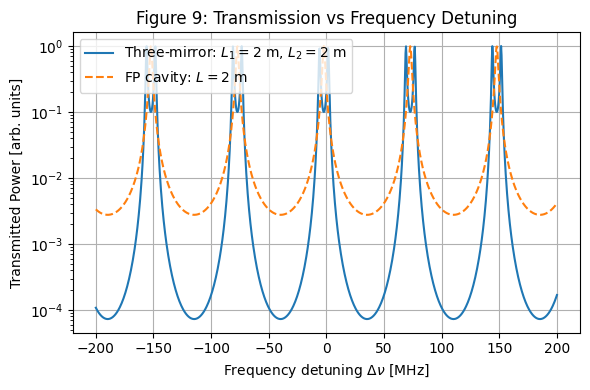

In [10]:
#Plots
plt.figure(figsize=(6, 4))
plt.semilogy(dnu*1e-6, T3_2, label='Three-mirror: $L_1=2$ m, $L_2=2$ m')
plt.semilogy(dnu*1e-6, TFP_2, '--', label='FP cavity: $L=2$ m')
#plt.semilogy(dnu*1e-6, TFP2, '--', label='FP cavity: $L=3$ m')

plt.xlabel("Frequency detuning $\\Delta\\nu$ [MHz]")
plt.ylabel("Transmitted Power [arb. units]")
plt.title("Figure 9: Transmission vs Frequency Detuning")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Bandwidth Tuning via Thermal Expansion

We model a three-mirror filter cavity as an effective two-mirror system (L_1 << L_2), where mirrors R_1 and R_2 are a thick mirror substrate that forms a subcavity of length L_1. Thermal expansion of this segment modulates the effective reflectivity and tunes the total cavity bandwidth.

Assuming $$R_1 = R_2 = R_{12},$$ the bandwidth of the system is approximately:

$$
\gamma = \frac{c}{8\pi L_2} \left( \frac{(1 - R_{12})^2}{1 - 2R_{12} \cos\left( \frac{4\pi L_1}{\lambda} \right) + R_{12}^2} + (1 - R_3) \right)
$$

Thermal tunability is achieved through the derivative:

$$
\frac{d\gamma}{dL_1} = \frac{c}{8\pi L_2} \cdot \frac{dT_{\text{eff}}}{d\phi} \cdot \frac{d\phi}{dL_1}, \quad \text{where } \phi = \frac{4\pi L_1}{\lambda}
$$

The effective reflectivity term \( T_{\text{eff}} \) has sensitivity:

$$
\frac{dT_{\text{eff}}}{d\phi} = -\frac{(1 - R_{12})^2 \cdot 2R_{12} \sin\left( \frac{4\pi L_1}{\lambda} \right)}{\left[1 - 2R_{12} \cos\left( \frac{4\pi L_1}{\lambda} \right) + R_{12}^2 \right]^2}
$$

The thermal tunability in Hz/°C is then:

$$
\text{Tunability} = \frac{d\gamma}{dL_1} \cdot \frac{dL_1}{dT}, \quad \text{where } \frac{dL_1}{dT} = \alpha \cdot L_1
$$

We target tunability of a few hundred Hz over a 10 °C swing, with baseline bandwidths from 10–500 kHz. This method scales well to long cavities—e.g., a 300 m cavity with a thin tuning optic L_1 of few mm retains high finesse while achieving controllable bandwidth variation.

<p align="center">
  <img src="effectivetwomirrorschematic.png" width="700"/>
</p>


In [23]:
def BW_tunability(L1,L2,R12,R3,lamb=1064e-9, tunability=0.55, heating_capacity=10):
    """
       Compute the baseline bandwidth and thermal tunability of a 3-mirror filter cavity.
    Parameters:
        L1: Thickness of tuning optic (m)
        L2: Cavity length (m)
        R1, R2, R3: Mirror reflectivities (unitless)
        lamb: Wavelength (m)cccc
        tunability: Thermal expansion coeff. (1/K)
        heating_capacity: Max temp swing (K)
    Returns:
        baseline_bw: Hz
        bw_expansion: Hz/K
        dL1_dT: m/K
        dgamma_dL1: Hz/m
    """
    c = 3e8
    prefactor = c/(8*np.pi*L2)
    num = (1-R12)**2
    denom = 1-2*R12*np.cos(4*np.pi*L1/lamb)+R12**2
    baseline_bw = prefactor*(num/denom + (1-R3))

    # Temperature Tunability
    dL1_dT = tunability*1e-6 * L1 
    #dTeff_dphi = (2 * R12*(1-R12)*(1-R12))/(1+R12*R12)**2 # at quadrature (phi = pi/2)
    dTeff_dphi = -num*(2*R12*np.sin(4*np.pi*L1/lamb))/(denom**2)
    dgamma_dL1 = prefactor * dTeff_dphi * (4*np.pi/lamb)
    bw_expansion = dgamma_dL1 * dL1_dT

    return baseline_bw, bw_expansion, dL1_dT, dgamma_dL1 

def T_3_mirror(k,L1,L2,R1,R2,R3):
    # Phase terms
    r1,r2,r3 = np.sqrt(R1), np.sqrt(R2), np.sqrt(R3)
    t1,t2,t3 = np.sqrt(1-R1), np.sqrt(1-R2), np.sqrt(1-R3)
    
    e_total = np.exp(2j*k*(L1+L2))
    e_L2 = np.exp(2j*k*L2)
    e_L1 = np.exp(2j*k*L1)

    num = -t1*t2*t3*np.exp(1j*k*(L1+L2))
    denom = (e_total - r1*r2*e_L2 - r2*r2*e_L1 + r1*r3*(r2**2+t2**2))

    return np.abs(num / denom)**2

### Parameter sweep for optimal L2, L2, R12, R3

In [25]:
# Sweep ranges
L1_vals = np.linspace(0.002, 0.06, 100)     # 2 mm to 10 cm
L2_vals = np.linspace(0.5, 2.5, 50)          # 0.75 m to 3 m
R1_vals = np.linspace(0.94, 0.999, 30)    
R3_vals = np.linspace(0.99, 0.9999, 10)

results = []

for L1 in L1_vals:
    for L2 in L2_vals:
        for R1 in R1_vals:
            for R3 in R3_vals:
                bw, bw_per_K, dL1_dT, dgamma_dL1 = BW_tunability(L1, L2, R1, R3)
                #print(f"bw={bw/1e3:.2f} kHz, bw_per_K={bw_per_K:.2f} Hz/K")
                if 10e3 <= bw <= 500e3 and 200 <= 10*bw_per_K <= 800:
                    results.append((L1, L2, R1, R3, bw, 10*bw_per_K))

# Sort by tunability
results.sort(key=lambda x: x[-1], reverse=True)

# Display top matches
for r in results[30:50]:
    print(f"L1={r[0]*1e3:.5f} mm, L2={r[1]:.5f} m, R1=R2={r[2]:.4f}, R3={r[3]:.5f}, BW={r[4]/1e3:.1f} kHz, Tunability/10°C={r[5]:.1f} Hz")

# Create DataFrame
df = pd.DataFrame(results, columns=["L1 (m)", "L2 (m)", "R1 = R2", "R3", "Baseline BW (Hz)", "Tunability/10°C (Hz)"])

# Save to CSV
df.to_csv("cavity_tunability_results.csv", index=False)

print("Saved results to 'cavity_tunability_results.csv'")

L1=19.57576 mm, L2=1.84694 m, R1=R2=0.9441, R3=0.99440, BW=41.6 kHz, Tunability/10°C=799.8 Hz
L1=19.57576 mm, L2=1.84694 m, R1=R2=0.9441, R3=0.99550, BW=34.5 kHz, Tunability/10°C=799.8 Hz
L1=19.57576 mm, L2=1.84694 m, R1=R2=0.9441, R3=0.99660, BW=27.4 kHz, Tunability/10°C=799.8 Hz
L1=19.57576 mm, L2=1.84694 m, R1=R2=0.9441, R3=0.99770, BW=20.3 kHz, Tunability/10°C=799.8 Hz
L1=19.57576 mm, L2=1.84694 m, R1=R2=0.9441, R3=0.99880, BW=13.2 kHz, Tunability/10°C=799.8 Hz
L1=54.14141 mm, L2=1.27551 m, R1=R2=0.9807, R3=0.99000, BW=94.5 kHz, Tunability/10°C=799.8 Hz
L1=54.14141 mm, L2=1.27551 m, R1=R2=0.9807, R3=0.99110, BW=84.2 kHz, Tunability/10°C=799.8 Hz
L1=54.14141 mm, L2=1.27551 m, R1=R2=0.9807, R3=0.99220, BW=73.9 kHz, Tunability/10°C=799.8 Hz
L1=54.14141 mm, L2=1.27551 m, R1=R2=0.9807, R3=0.99330, BW=63.6 kHz, Tunability/10°C=799.8 Hz
L1=54.14141 mm, L2=1.27551 m, R1=R2=0.9807, R3=0.99440, BW=53.3 kHz, Tunability/10°C=799.8 Hz
L1=54.14141 mm, L2=1.27551 m, R1=R2=0.9807, R3=0.99550, BW=4

In [38]:
def plot_bw_expansion(L1_best, L2_best, R1_best, R3_best):
    baseline_bw, bw_expansion, dL1_dT, dgamma_dL1 = BW_tunability(L1_best, L2_best, R1_best, R3_best)
    print(f"L1 : {L1_best} m, Baseline Bandwidth: {baseline_bw} Hz, Bandwidth Tunability: {bw_expansion} Hz/°C")

    # 2. Plot multiple temperature detunings
    plt.figure(figsize=(12, 6))
    dL1_arr = [dL1_dT * T for T in np.arange(0, 11)]
    dnu_arr = np.linspace(-200e6, 200e6, 1000)
    for dL1 in dL1_arr:
        T3_test = T_3_mirror(k, L1_best + dL1, L2_best, R1_best, R1_best, R3)
        plt.semilogy(
            dnu_arr * 1e-6,
            T3_test,
            label=(
                f"$L_1$={L1_best + dL1:.9f} m, "
                f"$L_2$={L2_best} m, BW={baseline_bw + dgamma_dL1*dL1:.1f} Hz"
            )
        )

    # 3. Labels & legend
    plt.xlabel("Frequency detuning $\\Delta\\nu$ [MHz]")
    plt.ylabel("Transmitted Power [arb. units]")
    plt.title(
        f"Transmission vs Frequency Detuning via Temperature Tuning of L1, "
        f"R1={R1_best}, R2={R1_best}, R3={R3_best}"
    )
    plt.grid(True)
    plt.legend(loc='upper right')

    # ——————— ADD: FSR and BW annotations ———————
    Ltot  = L1_best + L2             # total cavity length
    FSR   = c / (2 * Ltot)           # free spectral range in Hz
    FSR_MHz = FSR * 1e-6
    BW_MHz  = baseline_bw * 1e-6

    # Vertical lines at ±FSR
    plt.axvline(+FSR_MHz, color='k', ls='--', lw=1)
    plt.axvline(-FSR_MHz, color='k', ls='--', lw=1)
    plt.text(
        FSR_MHz, 1e-2,
        f"FSR = {FSR_MHz:.1f} MHz",
        ha='right', va='bottom', color='k'
    )

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

### Tunable Cavity Demonstration: L1 = 7.9 mm, L2 = 2.09 m, R12 = 0.9807, R3 = 0.9977

L1 : 0.0079 m, Baseline Bandwidth: 13769.742407392852 Hz, Bandwidth Tunability: 13.357133192046158 Hz/°C


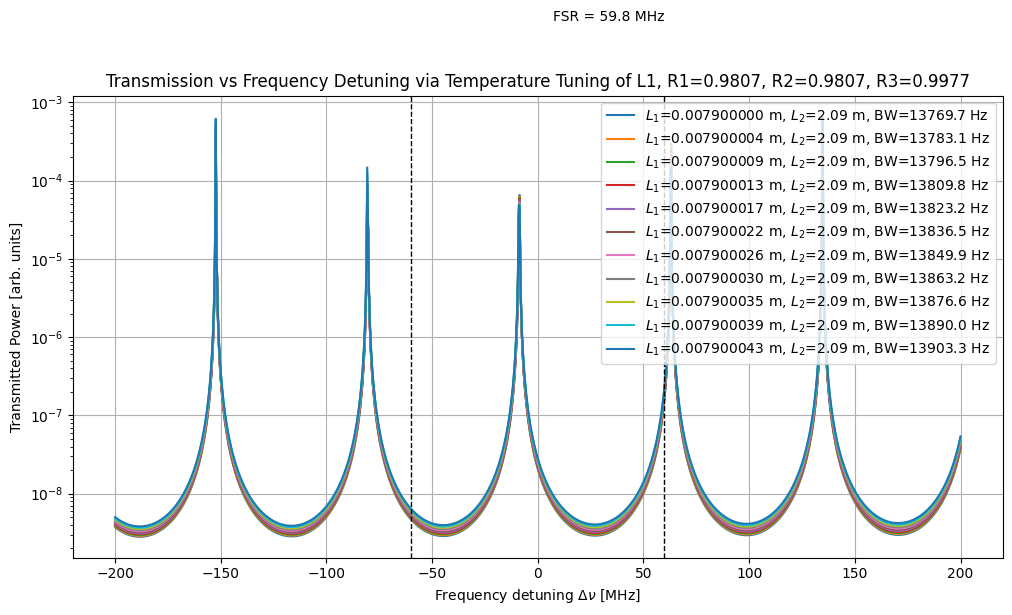

In [39]:
# 1. Set up and compute tunability
L1_best = 0.0079  # 6 mm
L2_best = 2.09
R1_best = 0.9807
R3_best = 0.9977

plot_bw_expansion(L1_best,L2_best,R1_best,R3_best)

### Baseline Bandwidth/Tunablity wrt L1, L2 = 2.09 m

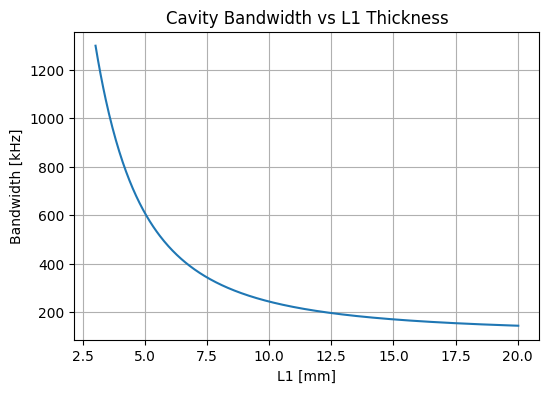

In [35]:
L1_range = np.linspace(0.003019, 0.020022, 500)
BW_vals = [BW_tunability(L1, L2_best, R1_best, R1_best, R3_best)[0] for L1 in L1_range]

plt.figure(figsize=(6, 4))
plt.plot(L1_range*1e3, np.array(BW_vals)*1e-3)
plt.xlabel("L1 [mm]")
plt.ylabel("Bandwidth [kHz]")
plt.title("Cavity Bandwidth vs L1 Thickness")
plt.grid()
plt.show()

L1 : 0.0079 m, Baseline Bandwidth: 60748.55990369439 Hz, Bandwidth Tunability: 165061.73428483537 Hz/°C


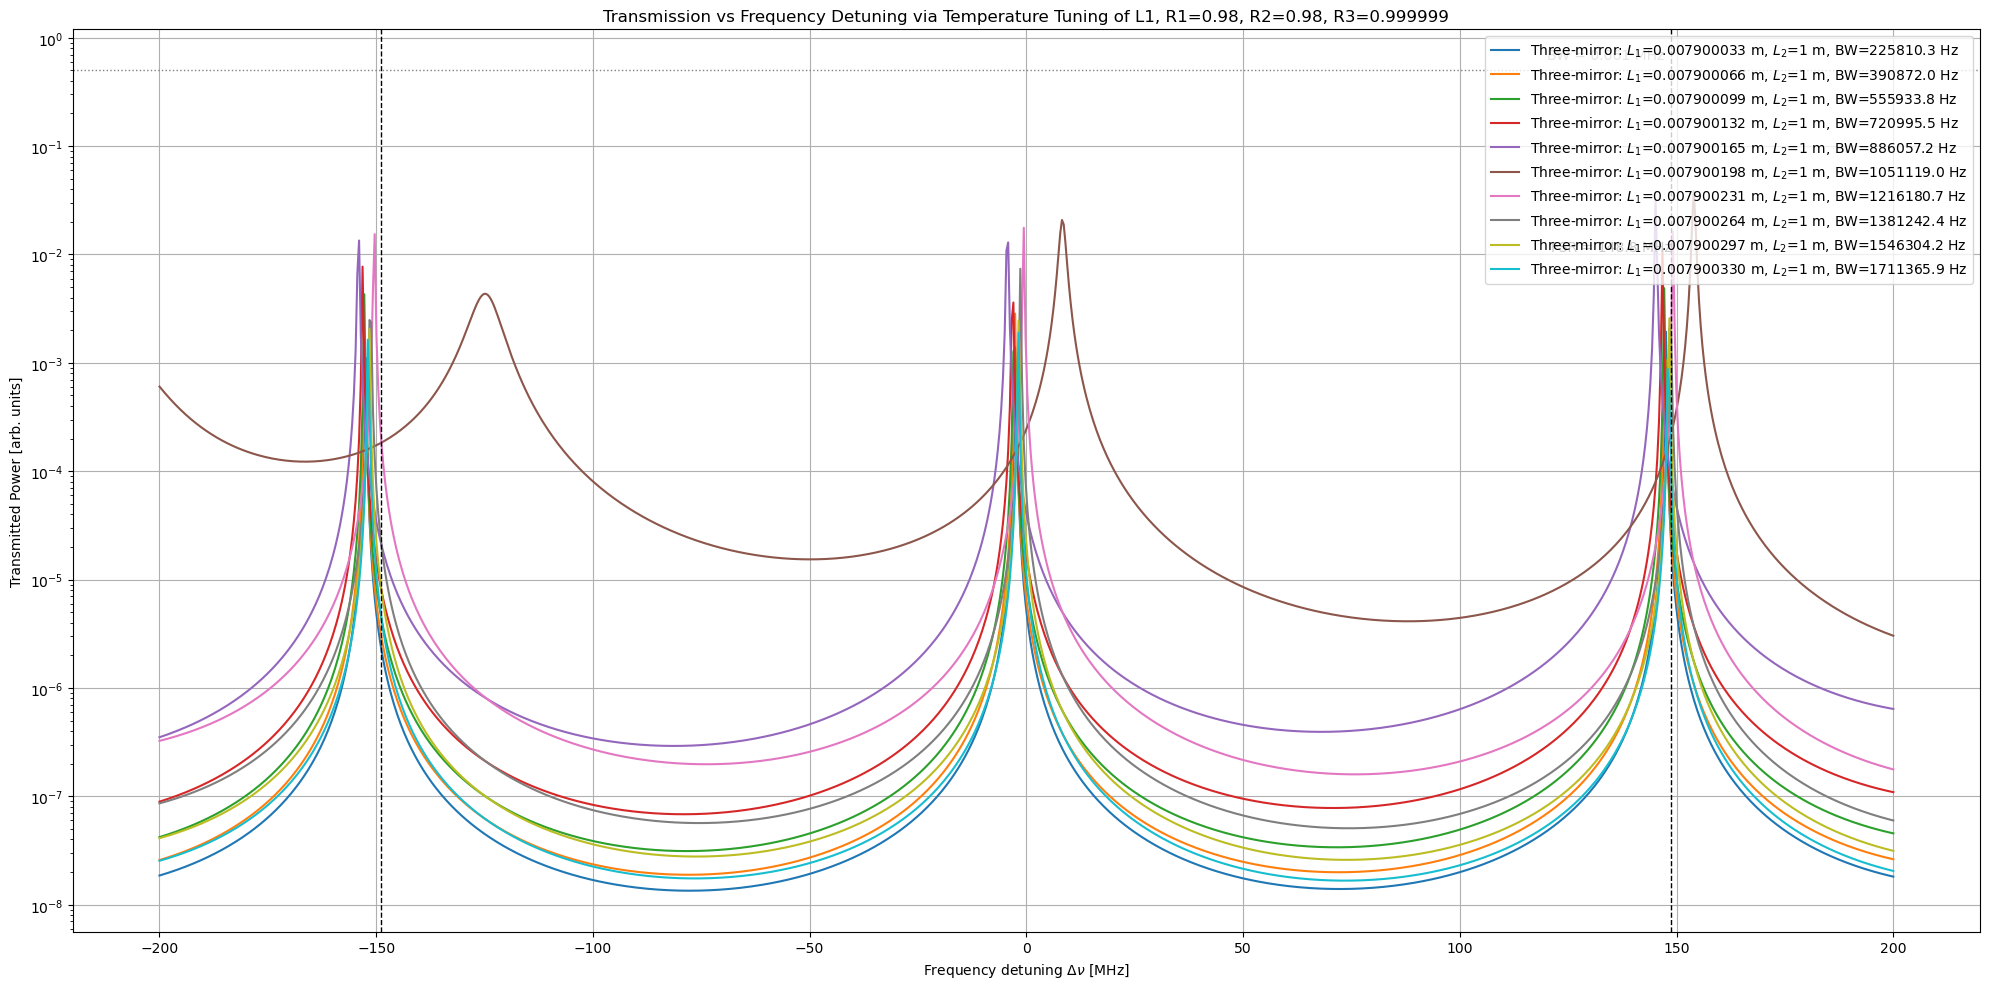

In [ ]:
# 1. Set up and compute tunability
L1_official = 0.0079  # 3.1 cm
L2_official = 297.55 # 300 m cavity for 3 ms storage time
R1_official = 0.9
R3_official = 1-1e-6
baseline_bw, bw_expansion, dL1_dT, dgamma_dL1 = BW_tunability(L1_official, L2_official, R1_official, R3_official)
print(f"L1 : {L1_best} m, Baseline Bandwidth: {baseline_bw} Hz, Bandwidth Tunability: {bw_expansion} Hz/°C")

# 2. Plot multiple temperature detunings
plt.figure(figsize=(20, 10))
dL1_arr = [dL1_dT * T for T in np.arange(1, 11)]
for dL1 in dL1_arr:
    T3_test = T_3_mirror(k, L1_best + dL1, L2, R1, R2, R3)
    plt.semilogy(
        dnu * 1e-6,
        T3_test,
        label=(
            f"Three-mirror: $L_1$={L1_best + dL1:.9f} m, "
            f"$L_2$={L2_official} m, BW={baseline_bw + dgamma_dL1*dL1:.1f} Hz"
        )
    )

# 3. Labels & legend
plt.xlabel("Frequency detuning $\\Delta\\nu$ [MHz]")
plt.ylabel("Transmitted Power [arb. units]")
plt.title(
    f"Transmission vs Frequency Detuning via Temperature Tuning of L1, "
    f"R1={R1_official}, R2={R1_official}, R3={R3_official}"
)
plt.grid(True)
plt.legend(loc='upper right')

# ——————— ADD: FSR and BW annotations ———————
c     = 3e8                      # speed of light (m/s)
Ltot  = L1_best + L2             # total cavity length
FSR   = c / (2 * Ltot)           # free spectral range in Hz
FSR_MHz = FSR * 1e-6
BW_MHz  = baseline_bw * 1e-6

# Vertical lines at ±FSR
plt.axvline(+FSR_MHz, color='k', ls='--', lw=1)
plt.axvline(-FSR_MHz, color='k', ls='--', lw=1)
plt.text(
    FSR_MHz, 1e-2,
    f"FSR = {FSR_MHz:.1f} MHz",
    ha='right', va='bottom', color='k'
)

# Horizontal line at half-max (–3 dB) assuming peak ≈1.0
half_max = 0.5
plt.axhline(half_max, color='gray', ls=':', lw=1)
plt.text(
    dnu.max()*1e-6 * 0.6, half_max * 1.2,
    f"BW = {BW_MHz:.3f} MHz",
    ha='left', va='bottom', color='gray'
)
# ———————————————————————————————

plt.tight_layout()
plt.show()

L1 : 0.006 m, Baseline Bandwidth: -5402.800428011294 Hz, Bandwidth Tunability: 949.0525184442195 Hz/°C


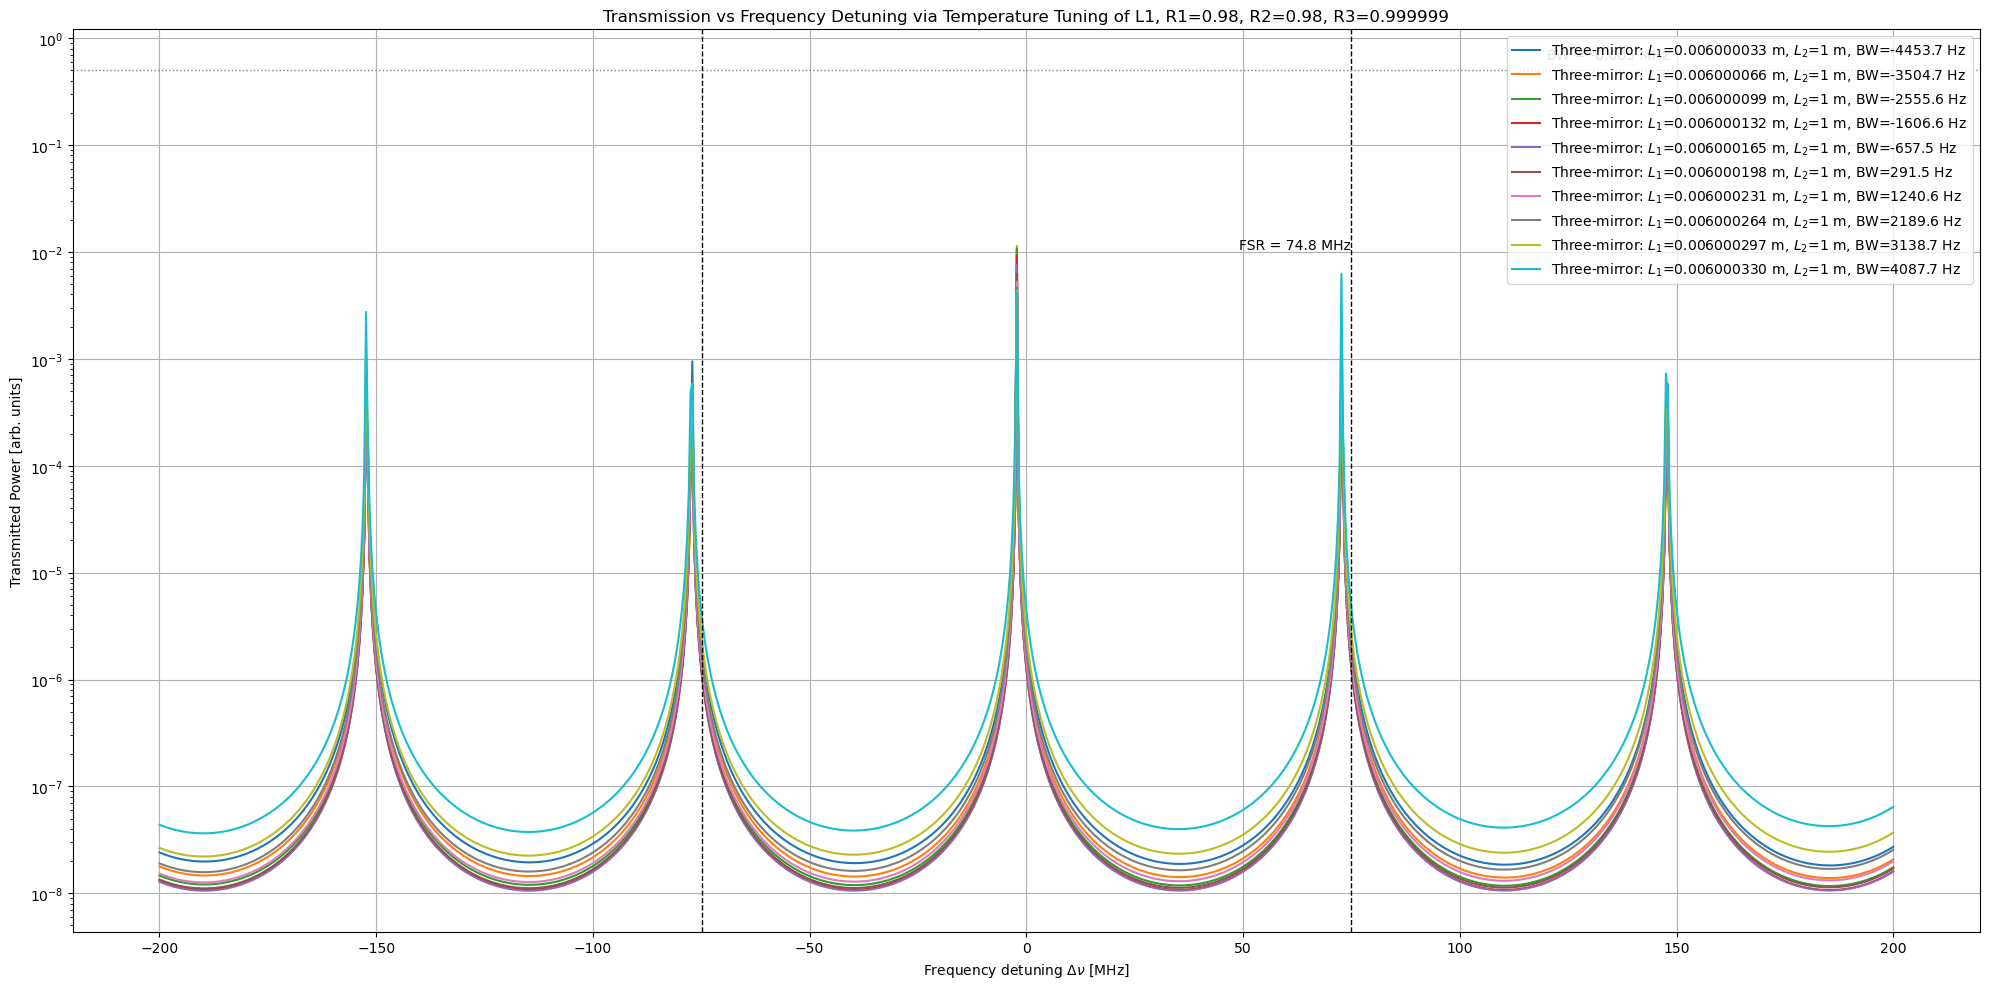

In [33]:
# 1. Set up and compute tunability
L1_official      = 0.06  # 3.1 cm
L2_official = 300 # 300 m cavity for 3 ms storage time
L2_official = 1
R1_official = 0.98
R3_official = 1-1e-6
baseline_bw, bw_expansion, dL1_dT, dgamma_dL1 = BW_tunability(L1_official, L2_official, R1_official, R1_official, R3_official)
print(f"L1 : {L1_best} m, Baseline Bandwidth: {baseline_bw} Hz, Bandwidth Tunability: {bw_expansion} Hz/°C")

# 2. Plot multiple temperature detunings
plt.figure(figsize=(20, 10))
dL1_arr = [dL1_dT * T for T in np.arange(1, 11)]
for dL1 in dL1_arr:
    T3_test = T_3_mirror(k, L1_best + dL1, L2, R1, R2, R3)
    plt.semilogy(
        dnu * 1e-6,
        T3_test,
        label=(
            f"Three-mirror: $L_1$={L1_best + dL1:.9f} m, "
            f"$L_2$={L2_official} m, BW={baseline_bw + dgamma_dL1*dL1:.1f} Hz"
        )
    )

# 3. Labels & legend
plt.xlabel("Frequency detuning $\\Delta\\nu$ [MHz]")
plt.ylabel("Transmitted Power [arb. units]")
plt.title(
    f"Transmission vs Frequency Detuning via Temperature Tuning of L1, "
    f"R1={R1_official}, R2={R1_official}, R3={R3_official}"
)
plt.grid(True)
plt.legend(loc='upper right')

# ——————— ADD: FSR and BW annotations ———————
c     = 3e8                      # speed of light (m/s)
Ltot  = L1_best + L2             # total cavity length
FSR   = c / (2 * Ltot)           # free spectral range in Hz
FSR_MHz = FSR * 1e-6
BW_MHz  = baseline_bw * 1e-6

# Vertical lines at ±FSR
plt.axvline(+FSR_MHz, color='k', ls='--', lw=1)
plt.axvline(-FSR_MHz, color='k', ls='--', lw=1)
plt.text(
    FSR_MHz, 1e-2,
    f"FSR = {FSR_MHz:.1f} MHz",
    ha='right', va='bottom', color='k'
)

# Horizontal line at half-max (–3 dB) assuming peak ≈1.0
half_max = 0.5
plt.axhline(half_max, color='gray', ls=':', lw=1)
plt.text(
    dnu.max()*1e-6 * 0.6, half_max * 1.2,
    f"BW = {BW_MHz:.3f} MHz",
    ha='left', va='bottom', color='gray'
)
# ———————————————————————————————

plt.tight_layout()
plt.show()

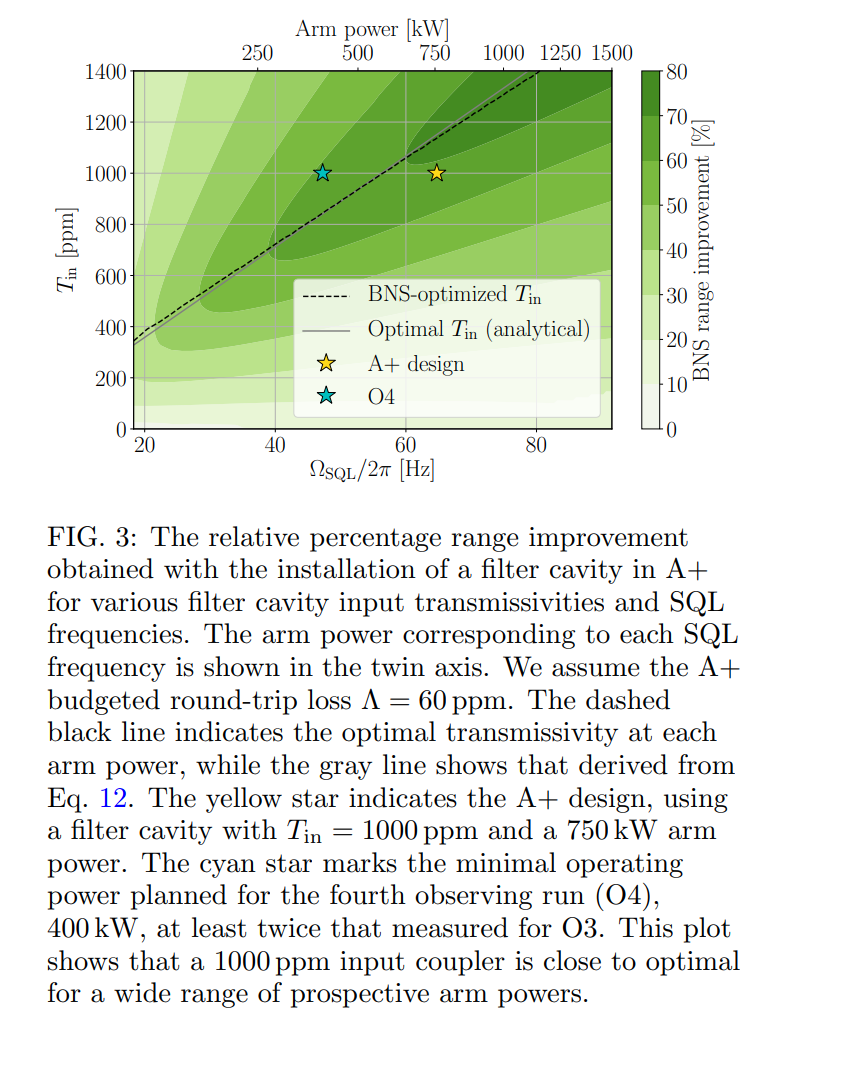